In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
customer_df = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/21.02.01/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [53]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [54]:
customer_df.shape

(9134, 24)

In [55]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ', '_'),customer_df.columns))

In [56]:
customer_df = customer_df.rename({'employmentstatus': 'employment_status'}, axis='columns')

In [57]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

Get Numericals

In [58]:
numericals = customer_df.select_dtypes(exclude = 'object')

Check if they fit normal distribution or exponential

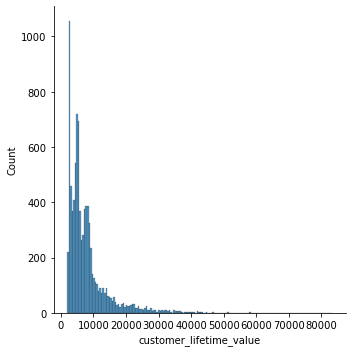

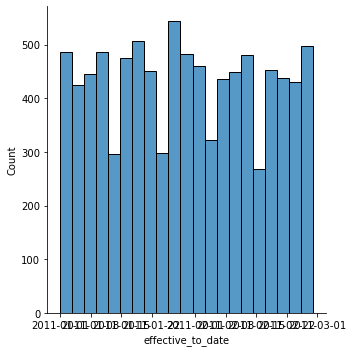

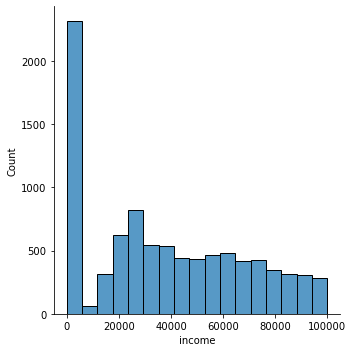

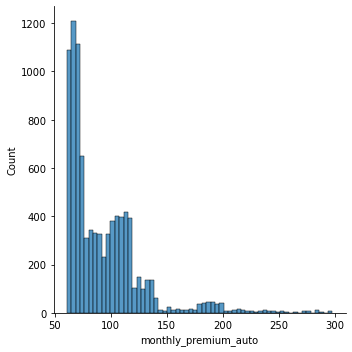

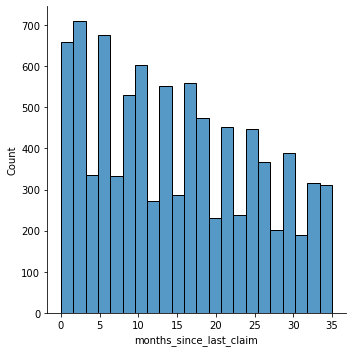

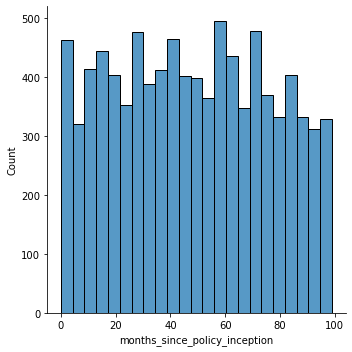

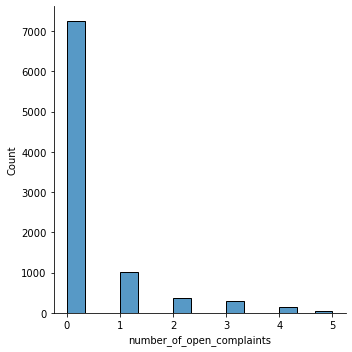

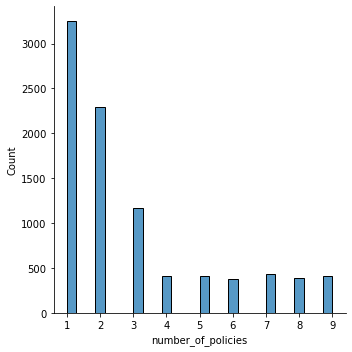

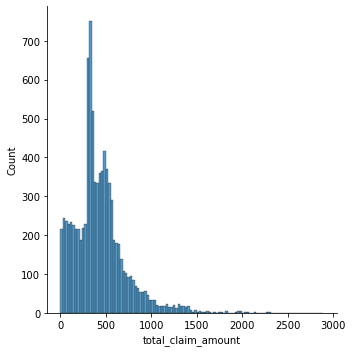

In [59]:
for x in numericals.columns:
    sns.displot(numericals[x])

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

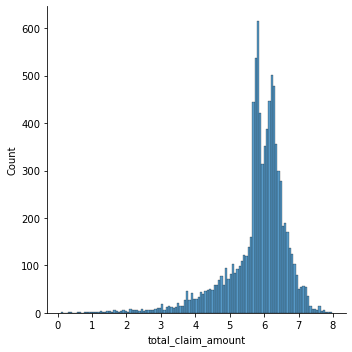

In [60]:
import numpy as np
from numpy import float64, int64
log_target = np.log1p(numericals["total_claim_amount"])
sns.displot(log_target)



In [61]:
log_target2 = np.log1p(numericals["customer_lifetime_value"])

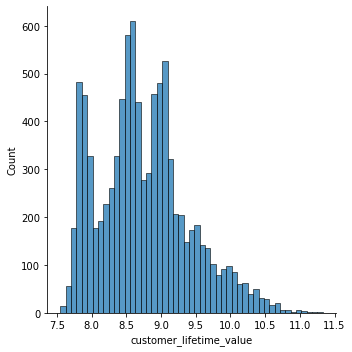

In [62]:
sns.displot(log_target2)

In [63]:
log_target3 = np.log1p(numericals["monthly_premium_auto"])

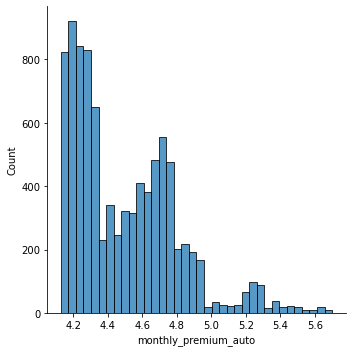

In [64]:
sns.displot(log_target3)

C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


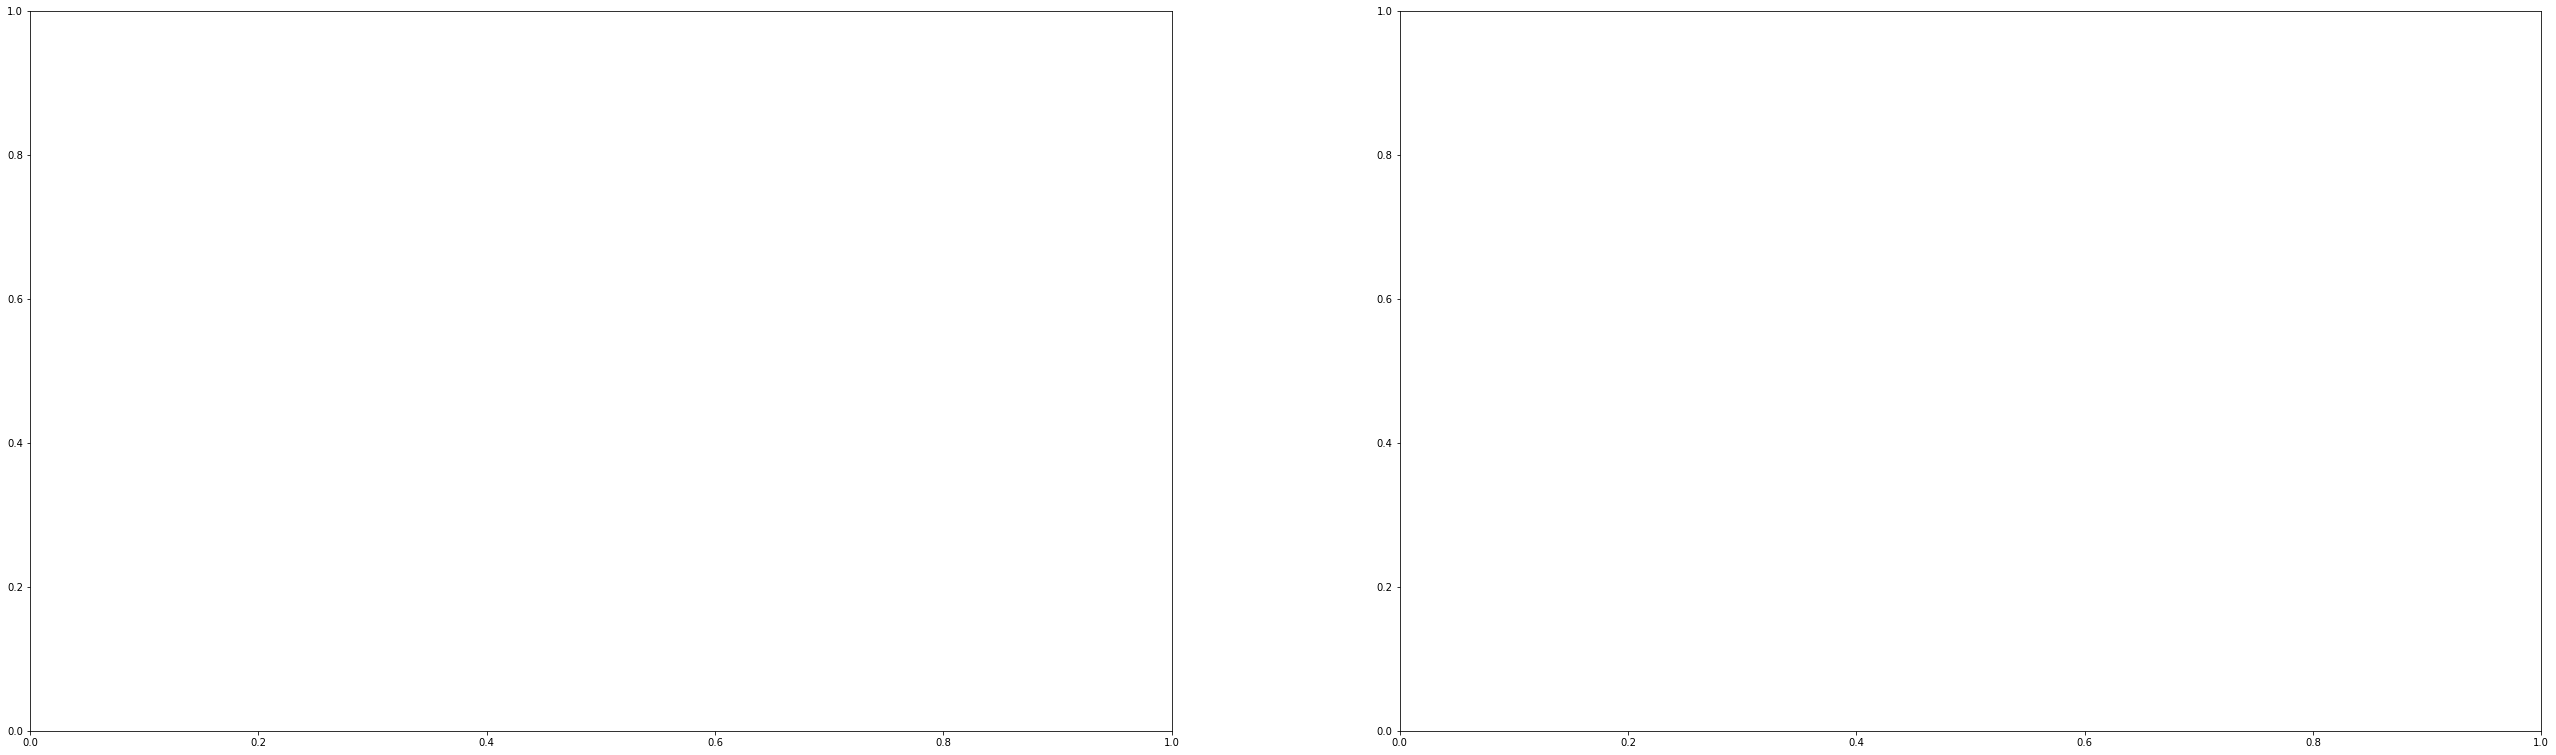

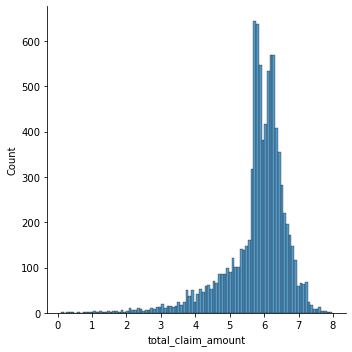

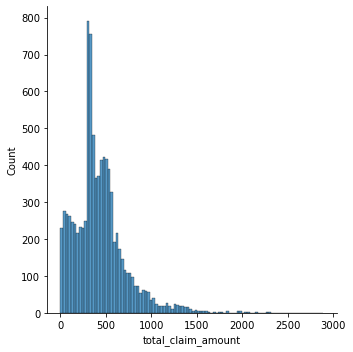

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (45,10)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.displot(log_target, bins = 100, ax=ax1) 
sns.displot(numericals['total_claim_amount'], bins = 100, ax=ax2) 


C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


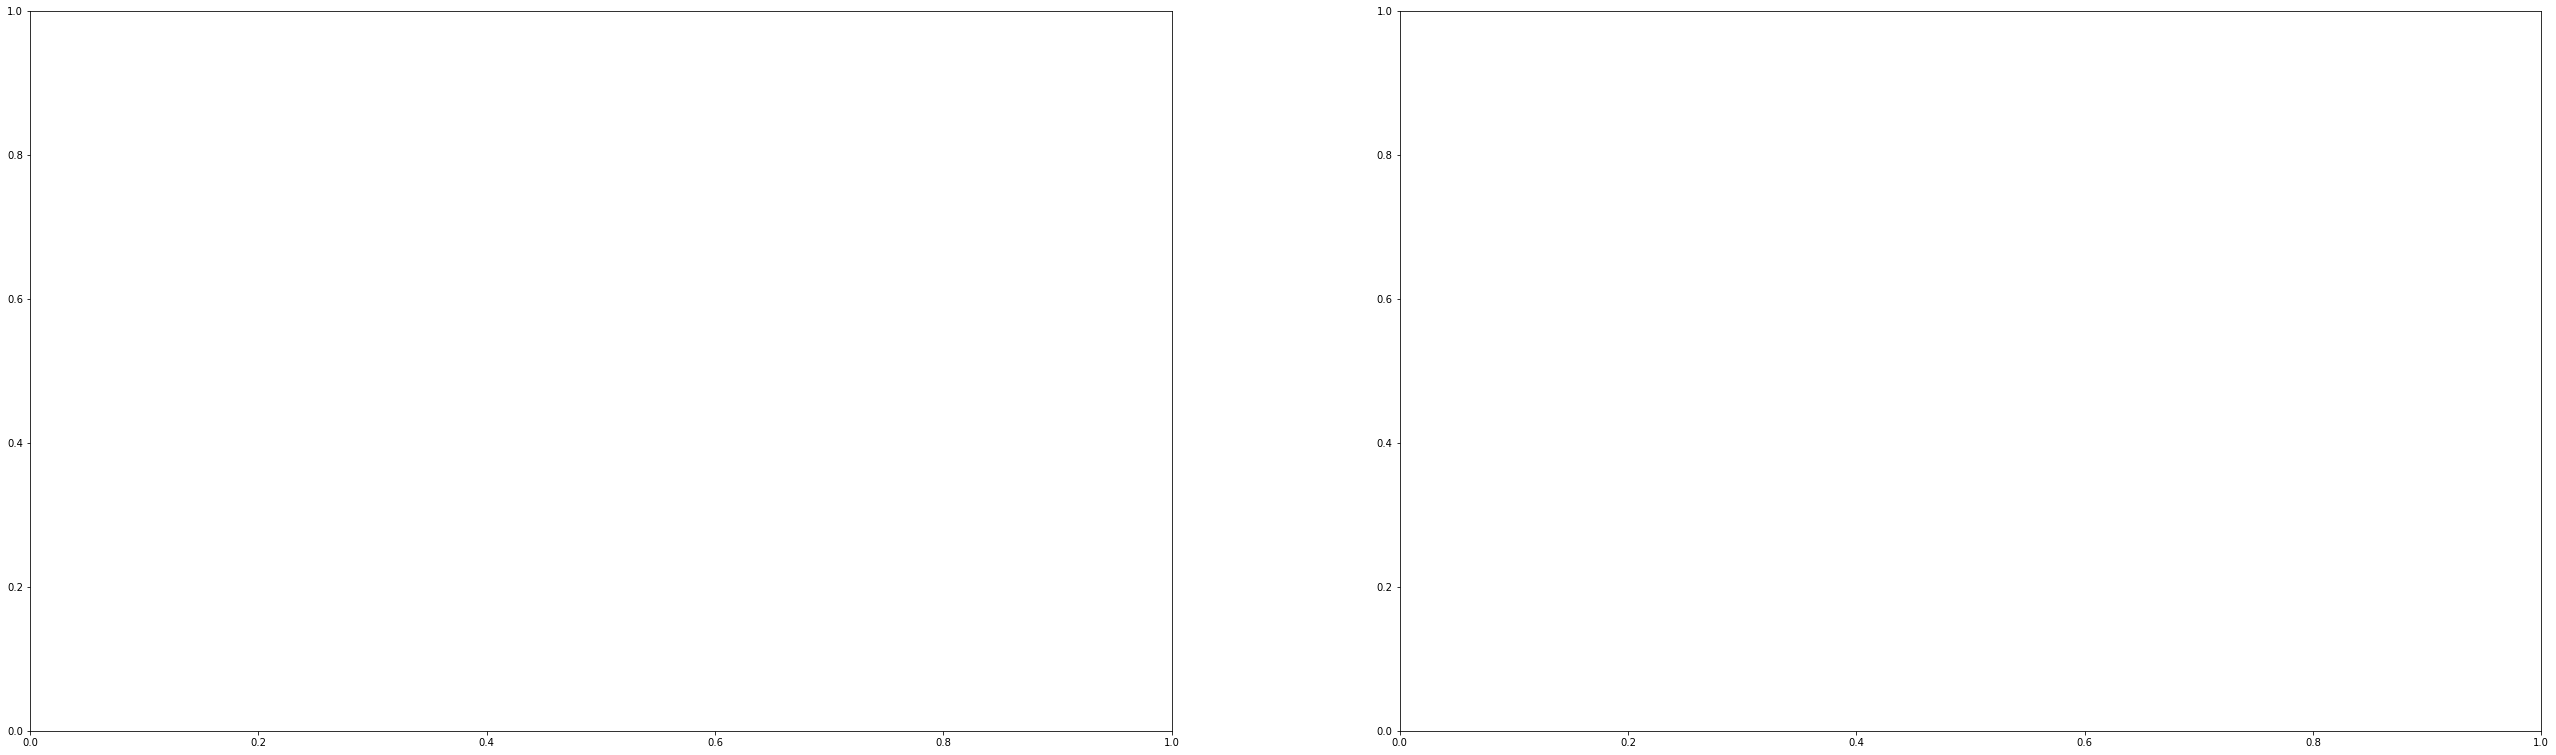

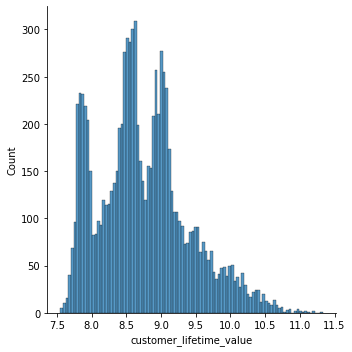

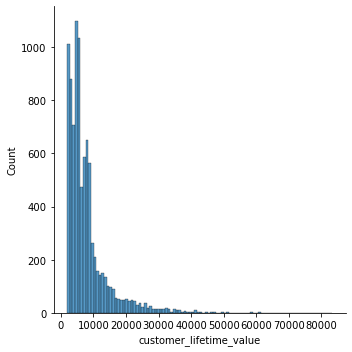

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (45,10)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.displot(log_target2, bins = 100, ax=ax1) 
sns.displot(numericals['customer_lifetime_value'], bins = 100, ax=ax2) 

C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\segre\OneDrive\Documents\anaconda new\envs\ironhack\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


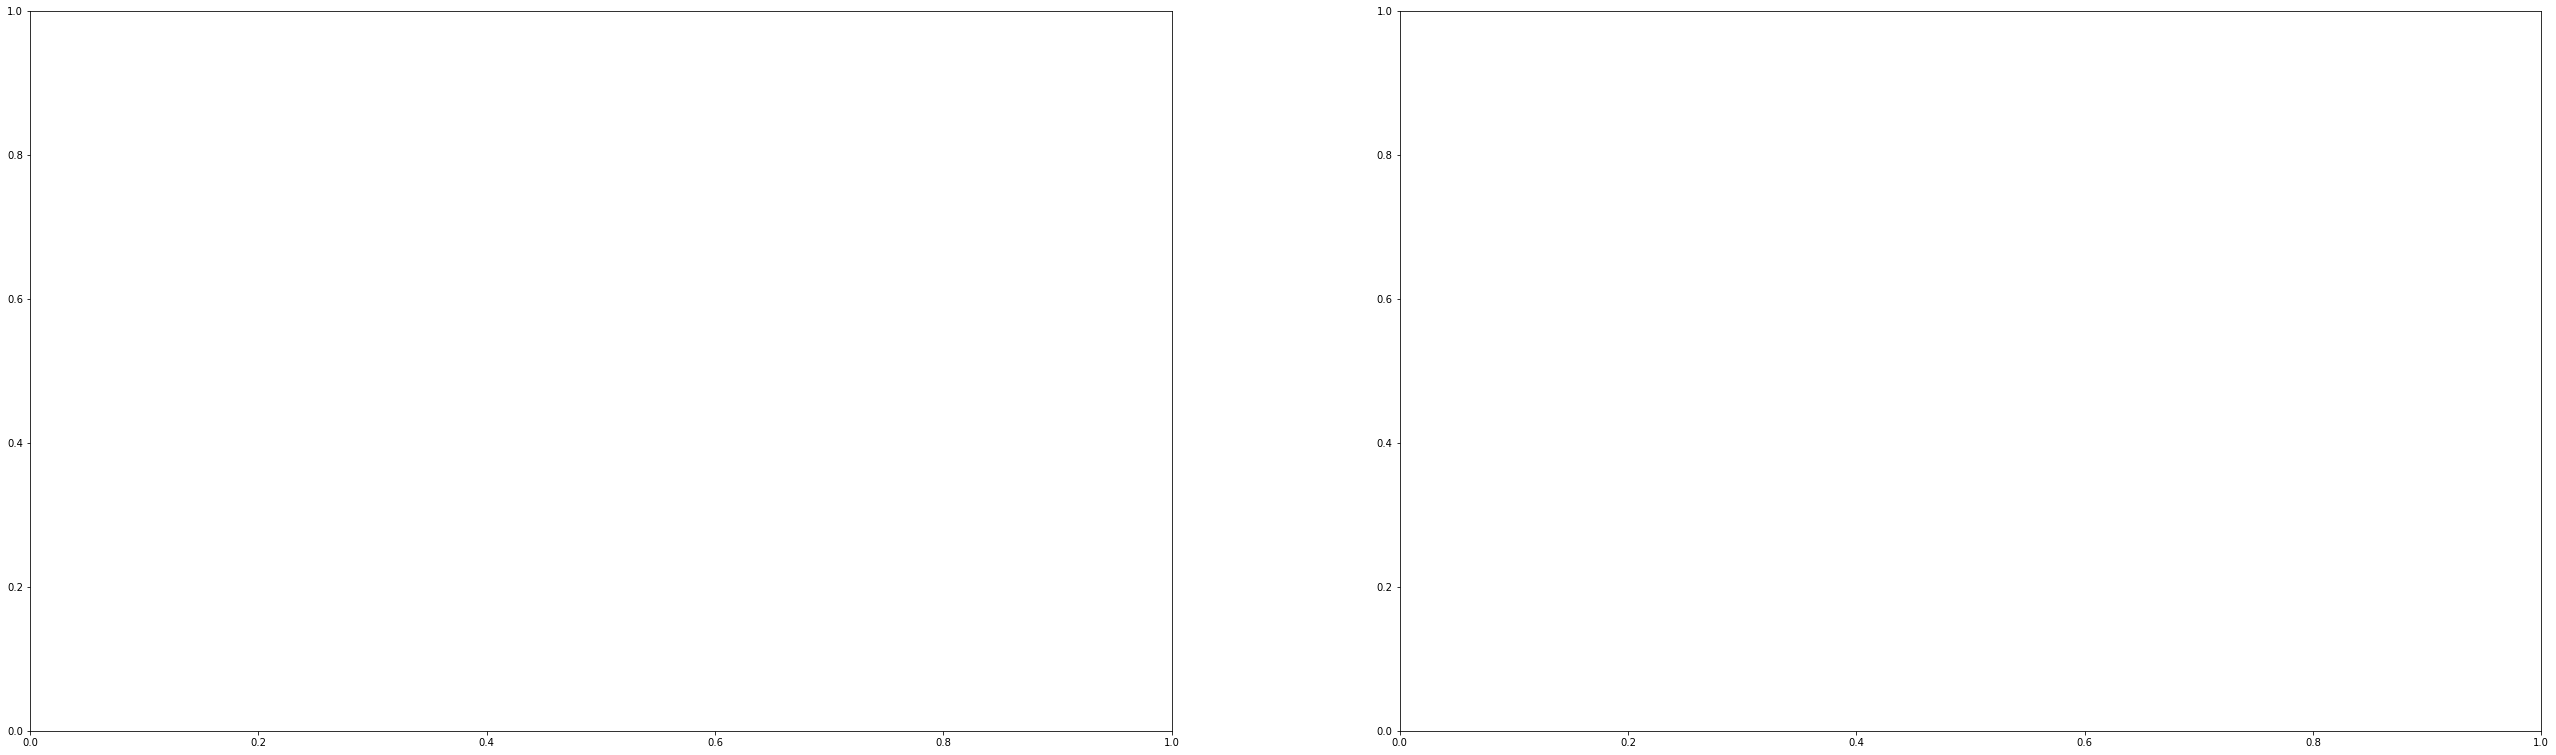

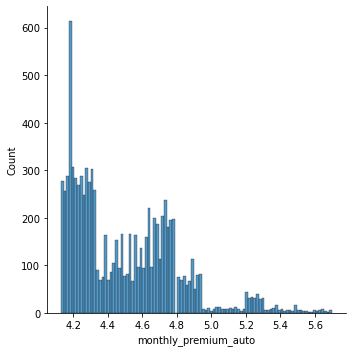

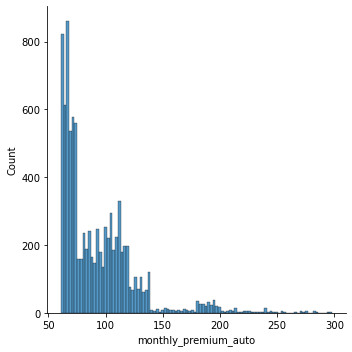

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (45,10)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.displot(log_target3, bins = 100, ax=ax1) 
sns.displot(numericals['monthly_premium_auto'], bins = 100, ax=ax2) 

In [ ]:
#numericals_log = numericals
#def log(x):
 #   for x in numericals_log.columns:
  #      if isinstance(x, (np.float64, np.int64)):
   #         apply(np.log(x+1))
#        else:
 #           return x
   # log_target = np.log(numericals[x])
    #sns.displot(log_target)
#numericals_log.apply(log)